In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss, acf, acovf, pacf
import datetime as dt

from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.tools.eval_measures import rmse, meanabs

import seaborn as sns
from statsmodels.stats.diagnostic import het_arch

In [48]:
NASDAQ = yf.download("^IXIC", interval='1m', start="2025-01-30", end="2025-01-31",auto_adjust=False,multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


In [54]:
type(NASDAQ['Adj Close'])

pandas.core.series.Series

In [37]:
NASDAQ.to_csv("NASDAQ_1m.csv", sep=",")

In [44]:
NASDAQ = pd.read_csv("NASDAQ_1m.csv",sep=',')
NASDAQ.dropna()
NASDAQ=NASDAQ['Adj Close']
df

10        19695.546875
11     19699.626953125
12      19708.14453125
13     19693.455078125
14     19677.556640625
            ...       
385      19691.3515625
386     19691.63671875
387     19678.39453125
388    19679.189453125
389       19678.046875
Name: Adj Close, Length: 380, dtype: object

In [45]:
df.drop(df.index[0:2], inplace=True)
type(df)

pandas.core.series.Series

In [46]:
NASDAQ.head(10)
NASDAQ.columns

AttributeError: 'Series' object has no attribute 'columns'

In [4]:
NASDAQ=NASDAQ[('Adj Close', '^IXIC')]
NASDAQ

Datetime
2025-01-30 14:30:00+00:00    19689.890625
2025-01-30 14:31:00+00:00    19712.109375
2025-01-30 14:32:00+00:00    19704.662109
2025-01-30 14:33:00+00:00    19692.095703
2025-01-30 14:34:00+00:00    19668.179688
                                 ...     
2025-01-30 20:55:00+00:00    19691.351562
2025-01-30 20:56:00+00:00    19691.636719
2025-01-30 20:57:00+00:00    19678.394531
2025-01-30 20:58:00+00:00    19679.189453
2025-01-30 20:59:00+00:00    19678.046875
Name: (Adj Close, ^IXIC), Length: 388, dtype: float64

In [303]:
adj_close_df = NASDAQ.to_frame().rename(columns={('Adj Close', '^IXIC'): 'Adj Close'})
adj_close_df.columns()

TypeError: 'MultiIndex' object is not callable

In [294]:
rNASDAQ = NASDAQ[('Adj Close', '^IXIC')]/('Adj Close', '^IXIC').shift(1)

KeyError: 'key of type tuple not found and not a MultiIndex'

In [253]:
#NASDAQ = NASDAQ.asfreq('min')
NASDAQ = NASDAQ.interpolate()

In [276]:
# Convertir la Series en DataFrame
NASDAQ = NASDAQ.to_frame()

# Vérifie les premières lignes du DataFrame
print(NASDAQ.head())

# Si tu veux réindexer avec une fréquence journalière
NASDAQ = NASDAQ.asfreq('min')

# Vérifie les colonnes et l'index
print(NASDAQ.index)
print(NASDAQ.columns)

NASDAQ.colums()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [47]:
NASDAQ.plot(figsize=(20,10))

TypeError: no numeric data to plot

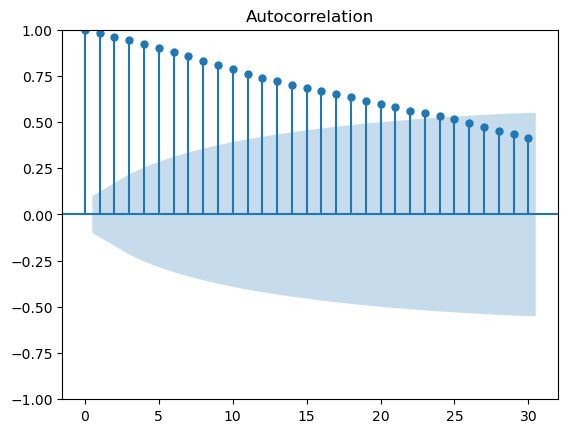

In [258]:
plot_acf(NASDAQ,  alpha=.05, lags=30)
plt.show()

In [259]:
coef_ac, confid_int = acf(NASDAQ, nlags=30, alpha=.05)
confid_int

array([[ 1.        ,  1.        ],
       [ 0.88387073,  1.082364  ],
       [ 0.79267396,  1.13261589],
       [ 0.72543879,  1.15969969],
       [ 0.66668198,  1.17520002],
       [ 0.61463477,  1.1850931 ],
       [ 0.56523009,  1.18911368],
       [ 0.52010893,  1.19082586],
       [ 0.47466602,  1.18707626],
       [ 0.43302451,  1.18264248],
       [ 0.39346847,  1.17663577],
       [ 0.35372434,  1.16730623],
       [ 0.31807124,  1.15919645],
       [ 0.28726418,  1.15356832],
       [ 0.25753593,  1.14713111],
       [ 0.22883544,  1.14001546],
       [ 0.2015099 ,  1.132725  ],
       [ 0.17638559,  1.1262439 ],
       [ 0.15110333,  1.11839763],
       [ 0.12408642,  1.10765496],
       [ 0.09866451,  1.09731126],
       [ 0.07371131,  1.08636776],
       [ 0.04969544,  1.07535852],
       [ 0.02883436,  1.06658176],
       [ 0.00697617,  1.05605108],
       [-0.01574845,  1.04388331],
       [-0.04160452,  1.0278081 ],
       [-0.06616632,  1.01216726],
       [-0.08906424,

In [260]:
for q, element in enumerate(coef_ac):
    if confid_int[q, 0] <= 0 <= confid_int[q, 1]:
        print(q-1)
        break

24


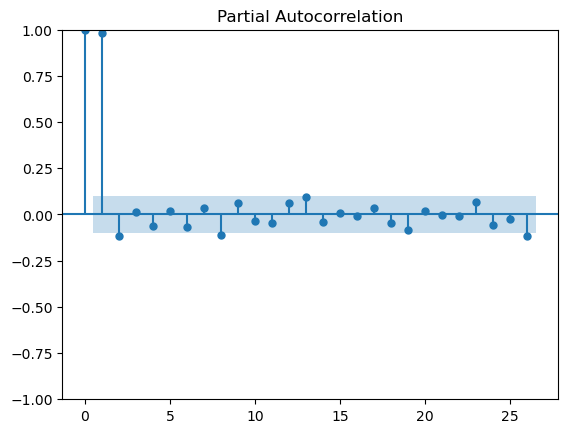

In [261]:
plot_pacf(NASDAQ,  alpha=.05)
plt.show()

In [262]:
coef_pac, confid_int_pac = pacf(NASDAQ, nlags=10, alpha=.05)

for p, element in enumerate(coef_pac):
    if confid_int_pac[p, 0] <= 0 <= confid_int_pac[p, 1]:
        print(p-1)
        break

2


# $ q = 24$ et $ p = 2$

In [263]:
type(NASDAQ)

pandas.core.series.Series

In [217]:
NASDAQ['date_column'] = pd.to_datetime(NASDAQ['date_column'])  # Convertir en datetime
NASDAQ.set_index('date_column', inplace=True)
NASDAQ = NASDAQ.asfreq('D')  # Assurer une fréquence journalière

KeyError: 'date_column'

In [266]:
NASDAQ.colums()

AttributeError: 'Series' object has no attribute 'colums'

In [202]:
NASD['date_column'])
NA.set_index('date_column', inplace=True)
NA = NA.asfreq('D') 

SyntaxError: unmatched ')' (2527050104.py, line 1)

In [264]:
NASDAQ[('Adj Close', '^IXIC')] = NASDAQ
result_dict = {}
for p in [0,1]:
    for q in [0,1,2,3,4]:
        if (p != 0 or q != 0):
            arma_mod = ARIMA(endog=NASDAQ[('Adj Close', '^IXIC')].dropna(), order=(p,0, q))
            fitx = arma_mod.fit()
            result_dict["ARMA_%s%s" % (p, q)] = fitx

KeyError: 'key of type tuple not found and not a MultiIndex'

In [ ]:
Q